<a href="https://colab.research.google.com/github/swapnalisingh13/Advance-ML/blob/main/2348565_Lab_5_Ridge_and_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tools.tools import add_constant
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso,Ridge

In [2]:
df=pd.read_csv("/content/program_5_dataset.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


EDA

In [4]:
df.shape

(615, 14)

In [5]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,613.000000,595.000000,612.000000,613.000000,615.000000,615.000000,604.000000,614.000000,615.000000,614.000000
mean,308.000000,47.408130,41.622838,68.263529,28.493627,34.731648,11.396748,8.196634,5.368013,81.271987,39.533171,72.044137
std,177.679487,10.055105,5.784979,26.049129,25.498962,33.090023,19.673150,2.205657,1.133665,49.795186,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.607500,67.000000,15.700000,69.300000
50%,308.000000,47.000000,42.000000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,76.850000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.100000,32.900000,11.200000,9.590000,6.065000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [6]:
df.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [13]:
imputer = SimpleImputer(strategy='mean')
df[['ALB', 'ALP', 'ALT', 'AST', 'CHOL', 'CREA', 'PROT']] = imputer.fit_transform(df[['ALB', 'ALP', 'ALT', 'AST', 'CHOL', 'CREA', 'PROT']])


In [9]:
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

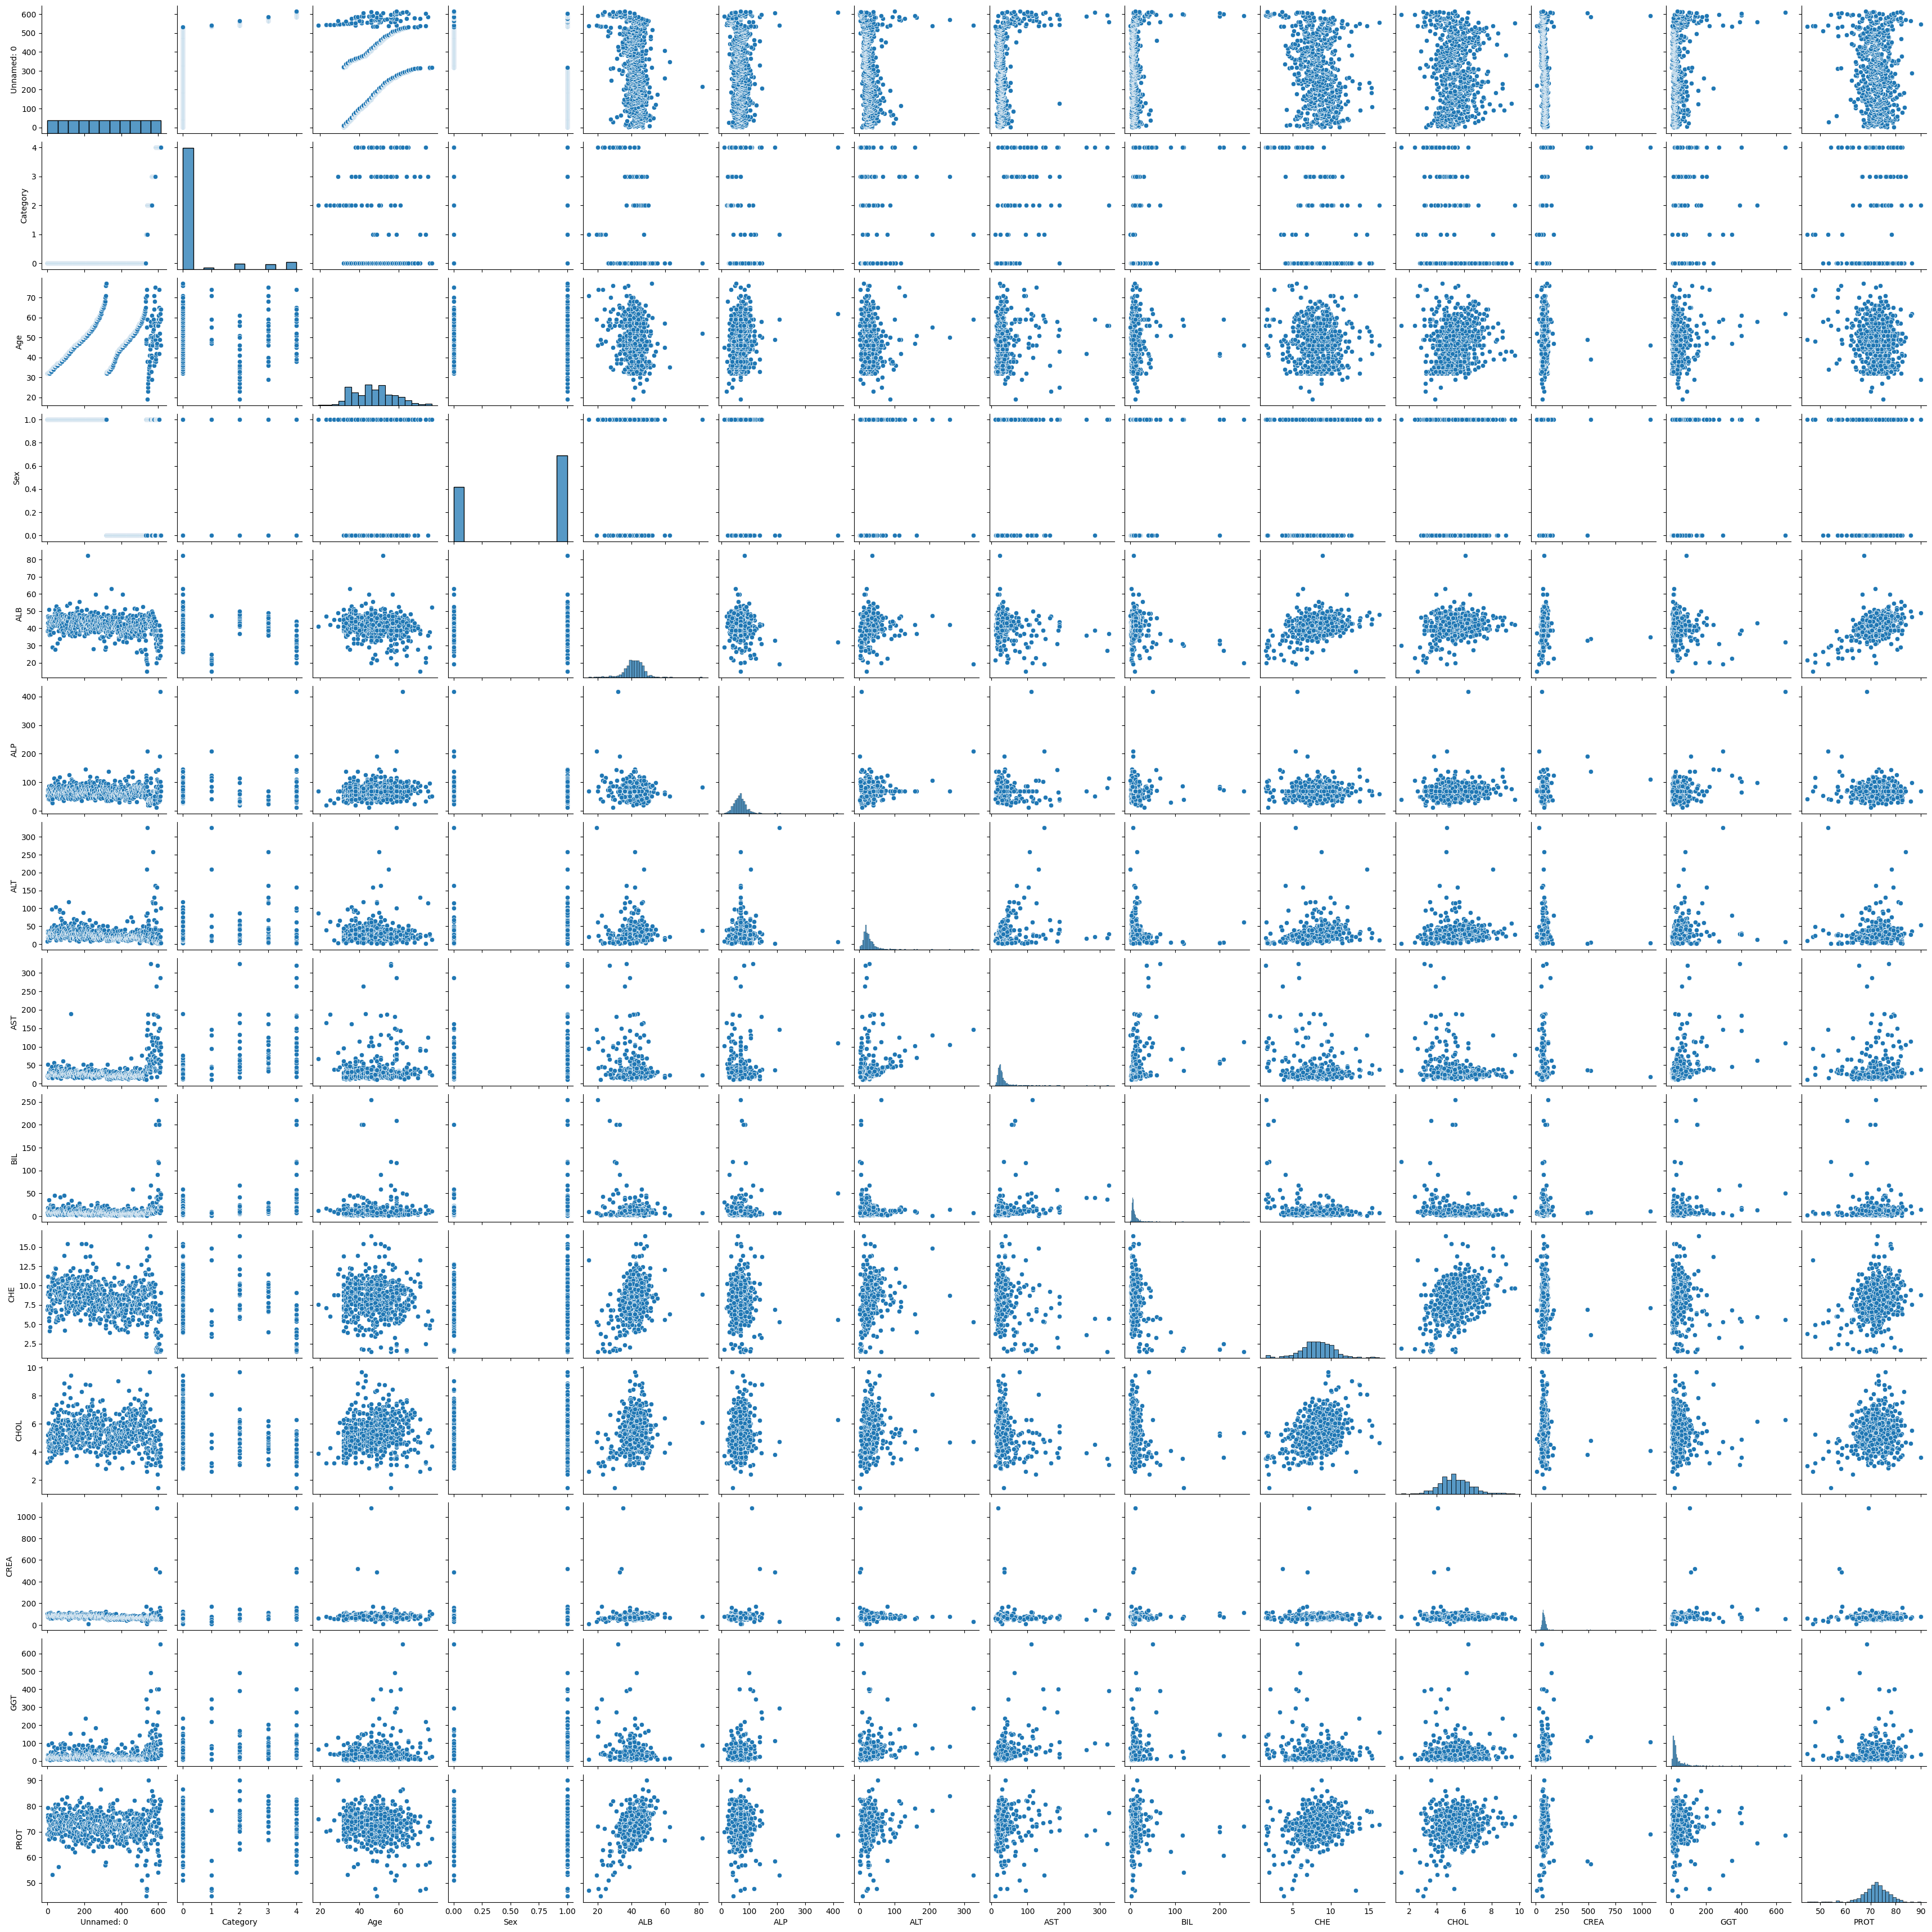

In [14]:
sns.pairplot(df)

### **Linear Regression**

In [43]:
X = df[['CREA']]
y = df[['PROT']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[-0.00391482]]
Intercept: [72.25442087]


In [47]:
y_test_pred = model.predict(X_test)

In [50]:
score1 = r2_score(y_test,y_test_pred)
print('R2 score: ',score1)
mse1 = mean_squared_error(y_test, y_test_pred)
print('MSE: ',mse1)

R2 score:  -0.01050893132580022
MSE:  31.659951887601213


### **VIF**

In [26]:
selected_features = df.drop(['Unnamed: 0', 'Category', 'Age', 'Sex'], axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(add_constant(selected_features).values, i+1) for i in range(selected_features.shape[1])]

print(vif_data)

  feature       VIF
0     ALB  1.673475
1     ALP  1.364027
2     ALT  1.185731
3     AST  1.648434
4     BIL  1.238408
5     CHE  1.511112
6    CHOL  1.290697
7    CREA  1.046441
8     GGT  1.749013
9    PROT  1.548864


In [51]:
predictors = df[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA','GGT']]
vif = pd.DataFrame()
vif["Predictors"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
print(vif)

  Predictors        VIF
0        ALB  30.939391
1        ALP   9.894721
2        ALT   2.671327
3        AST   3.103881
4        BIL   1.572421
5        CHE  22.129342
6       CHOL  26.864335
7       CREA   3.746091
8        GGT   2.600775



Some of the VIF values are below 10. so it suggest that this columns in our dataset doesn't have multicollinearity.

It also suggests that the predictor variables (ALP, ALT, AST, BIL, CREA, GGT, and PROT) are not highly correlated with each other, and they can be considered as good predictors for the regression analysis.

### **Train-Test Split**

In [52]:
drop1=['PROT','ALB','CHE','CHOL']
X=df.drop(drop1,axis=1)
y = df[['PROT']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Multiple Linear Regression**

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
#coefficients and intercept values
coeff = model.coef_
intercept = model.intercept_
print("Coefficients: ",coeff, "\nIntercept: ",intercept)

Coefficients:  [[-0.00678781  0.45300476 -0.04648068 -1.07371281 -0.01349868 -0.00114306
   0.00732729 -0.02339334 -0.00450307  0.01078909]] 
Intercept:  [77.63850338]


In [55]:
y_test_pred = model.predict(X_test)

In [56]:
mse_test = mean_squared_error(y_test, y_test_pred)
# -average squared difference between the predicted values and the actual values.
print("\nTesting MSE: ",mse_test)


Testing MSE:  32.16199070284618


In [57]:
r2_test = r2_score(y_test, y_test_pred)
print("Testing R-squared: ",r2_test)

Testing R-squared:  -0.026532793537541233


In [108]:
mae = mean_absolute_error(y_test, y_test_pred)
print('MAE: ',mae)

MAE:  4.128348266975605


### **Polynomial Regression**

Highest VIF is of the column 'GGT'.

In [66]:
X = df[['ALB']]
y = df[['PROT']]

In [67]:
X = X.values.reshape(-1, 1)
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Degree - 2

In [68]:
p=PolynomialFeatures(degree=2, include_bias=True)
X_train_p1 = p.fit_transform(X_train)
X_test_p1 = p.transform(X_test)

In [109]:
reg_model1=LinearRegression()
reg_model1.fit(X_train_p1,y_train)
y_predict1=reg_model1.predict(X_test_p1)
score1 = r2_score(y_test,y_predict1)
print('R2 score: ',score1)
mse1 = mean_squared_error(y_test, y_predict1)
print('MSE: ',mse1)
mae1 = mean_absolute_error(y_test, y_predict3)
print('MAE: ',mae1)

R2 score:  0.19134104084631987
MSE:  25.335851021814232
MAE:  3.5675839977545323


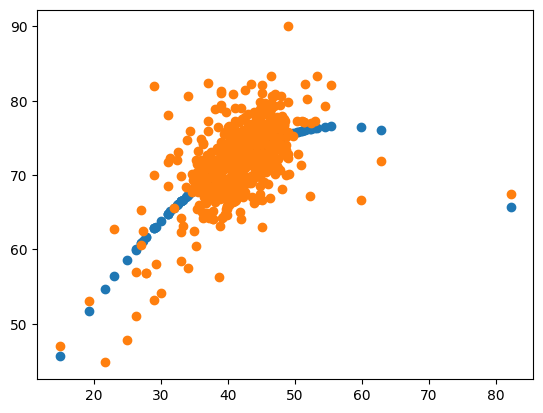

In [70]:
plt.scatter(X_train,reg_model1.predict(X_train_p1))
plt.scatter(X_train,y_train)

Degree-3

In [72]:
p=PolynomialFeatures(degree=3, include_bias=True)
x_train_p2 = p.fit_transform(X_train)
x_test_p2 = p.transform(X_test)

In [110]:
reg_model2=LinearRegression()
reg_model2.fit(x_train_p2,y_train)
y_predict2=reg_model2.predict(x_test_p2)
score2 = r2_score(y_test,y_predict2)
print('R2 score: ',score2)
mse2 = mean_squared_error(y_test, y_predict2)
print('MSE: ',mse2)
mae2 = mean_absolute_error(y_test, y_predict3)
print('MAE: ',mae2)

R2 score:  0.18512556864579444
MSE:  25.530586114921405
MAE:  3.5675839977545323


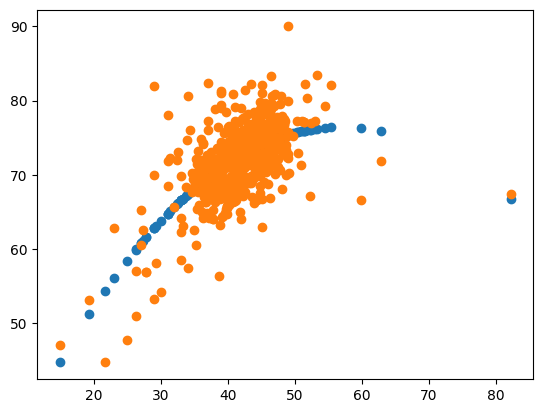

In [75]:
plt.scatter(X_train,reg_model2.predict(x_train_p2))
plt.scatter(X_train,y_train)


Degree - 4

In [77]:
p=PolynomialFeatures(degree=4, include_bias=True)
x_train_p3 = p.fit_transform(X_train)
x_test_p3 = p.transform(X_test)

In [111]:
reg_model3=LinearRegression()
reg_model3.fit(x_train_p3,y_train)
y_predict3=reg_model3.predict(x_test_p3)
score3 = r2_score(y_test,y_predict3)
print('R2 score: ',score3)
mse3 = mean_squared_error(y_test, y_predict3)
print('MSE: ',mse3)
mae3 = mean_absolute_error(y_test, y_predict3)
print('MAE: ',mae3)

R2 score:  0.1842496652563793
MSE:  25.558028780995308
MAE:  3.5675839977545323


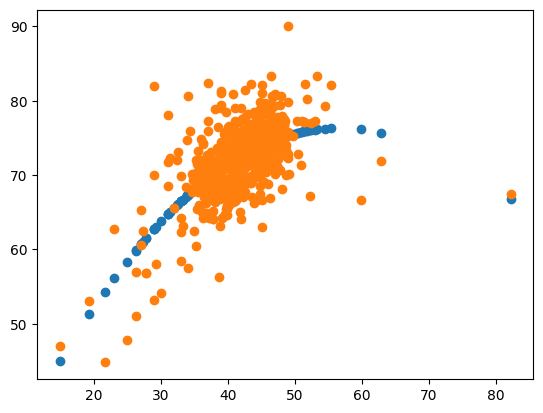

In [79]:
plt.scatter(X_train,reg_model3.predict(x_train_p3))
plt.scatter(X_train,y_train)

### **Ridge Regression**

In [86]:
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)

In [87]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45,
                                   50, 55, 100, 150]},
             scoring='neg_mean_squared_error')

In [88]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 150}
-20.130612057753943


In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

Cross Validaltion and N-Fold

In [100]:
model1 = Ridge(alpha=150)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model1, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 3.263 (0.409)


In [101]:
num_folds = 10
cross_val_scores = cross_val_score(model1, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')
positive_cross_val_scores = -cross_val_scores
#taking positive values here.
mean_score = positive_cross_val_scores.mean()
std_deviation = positive_cross_val_scores.std()

print(f"Mean cross-validation score: {mean_score:.2f}")
print(f"Standard deviation of cross-validation scores: {std_deviation:.2f}")

Mean cross-validation score: 20.41
Standard deviation of cross-validation scores: 8.58


### **Lasso Regression**

In [93]:
lasso=Lasso()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45,
                                   50, 55, 100]},
             scoring='neg_mean_squared_error')

In [95]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-20.13322205629104


In [102]:
model2 = Lasso(alpha=1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model2, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 3.268 (0.408)


In [103]:
num_folds = 10
cross_val_scores = cross_val_score(model2, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')
positive_cross_val_scores = -cross_val_scores
#taking positive values here.
mean_score = positive_cross_val_scores.mean()
std_deviation = positive_cross_val_scores.std()

print(f"Mean cross-validation score: {mean_score:.2f}")
print(f"Standard deviation of cross-validation scores: {std_deviation:.2f}")

Mean cross-validation score: 20.41
Standard deviation of cross-validation scores: 8.32
